# Student Name: Qadeer Hussain

# Lecture: Greg Doyle

# Topic: K Nearest Neighbour Classification

# Car Evaluation

# Last Modified: 27 Feb 2025

In [18]:
# Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# Import data

Import data using SKlearn Library

In [19]:
file_path = 'car.data'
columns = [
    "buying", "maint", "doors", "persons", "lug_boot", "safety", "class"
]

# Reading the data into a DataFrame with proper column names
data = pd.read_csv(file_path, header=None, names=columns)

# Display the first few rows of the DataFrame to check
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


Checking for any missing values

In [20]:
missing_values = data.isnull().sum()
print(missing_values)

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


Data Encoding

In [21]:
data_encoded = pd.get_dummies(data, columns=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

Splitting the data into features and target variable

In [22]:
X = data_encoded.drop('class', axis=1)
y = data['class']          

Splitting data into training and testing sets

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [24]:
print(X_train.dtypes)
print(y_train.dtype)

buying_high       bool
buying_low        bool
buying_med        bool
buying_vhigh      bool
maint_high        bool
maint_low         bool
maint_med         bool
maint_vhigh       bool
doors_2           bool
doors_3           bool
doors_4           bool
doors_5more       bool
persons_2         bool
persons_4         bool
persons_more      bool
lug_boot_big      bool
lug_boot_med      bool
lug_boot_small    bool
safety_high       bool
safety_low        bool
safety_med        bool
dtype: object
object


In [25]:
X_train = X_train.astype(int)
print(X_train.dtypes)

buying_high       int64
buying_low        int64
buying_med        int64
buying_vhigh      int64
maint_high        int64
maint_low         int64
maint_med         int64
maint_vhigh       int64
doors_2           int64
doors_3           int64
doors_4           int64
doors_5more       int64
persons_2         int64
persons_4         int64
persons_more      int64
lug_boot_big      int64
lug_boot_med      int64
lug_boot_small    int64
safety_high       int64
safety_low        int64
safety_med        int64
dtype: object


In [26]:
# Applying SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

Code below which has been commented was used to find the best neighbour parameters

In [27]:
f1_scores = []
neighbor_settings = range(1, 26)  # Test k values from 1 to 25

for n_neighbors in neighbor_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train_smote, y_train_smote)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    f1_scores.append(f1)

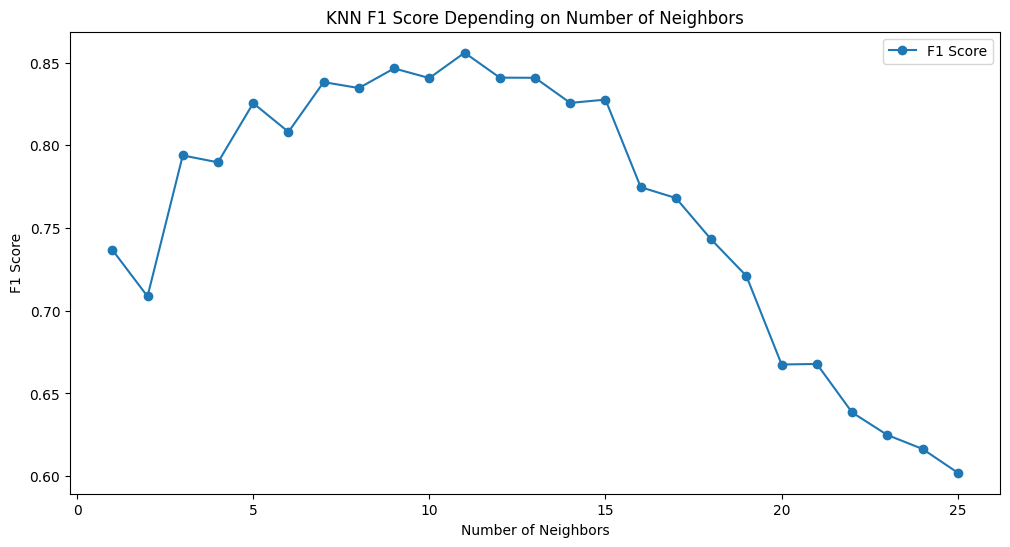

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(neighbor_settings, f1_scores, label='F1 Score', marker='o')
plt.title('KNN F1 Score Depending on Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [29]:
best_k = neighbor_settings[f1_scores.index(max(f1_scores))]
print("Best k:", best_k)
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_smote, y_train_smote)
y_pred_best = knn_best.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Best k: 11
Accuracy: 0.8362235067437379
              precision    recall  f1-score   support

         acc       0.79      0.66      0.72       121
        good       0.31      0.90      0.46        20
       unacc       1.00      0.90      0.95       354
       vgood       0.44      0.75      0.55        24

    accuracy                           0.84       519
   macro avg       0.63      0.80      0.67       519
weighted avg       0.90      0.84      0.86       519



In [30]:
# Best KNN: 11
knn = KNeighborsClassifier(n_neighbors=11, weights='distance')

# Train the model using the training data
knn.fit(X_train_smote, y_train_smote)

# Predict the response for the test dataset
y_pred = knn.predict(X_test)

Classification report

In [31]:
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

# Detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.8265895953757225
              precision    recall  f1-score   support

         acc       0.75      0.67      0.71       121
        good       0.29      0.80      0.43        20
       unacc       1.00      0.89      0.94       354
       vgood       0.44      0.75      0.55        24

    accuracy                           0.83       519
   macro avg       0.62      0.78      0.66       519
weighted avg       0.89      0.83      0.85       519



Confusion Matrix

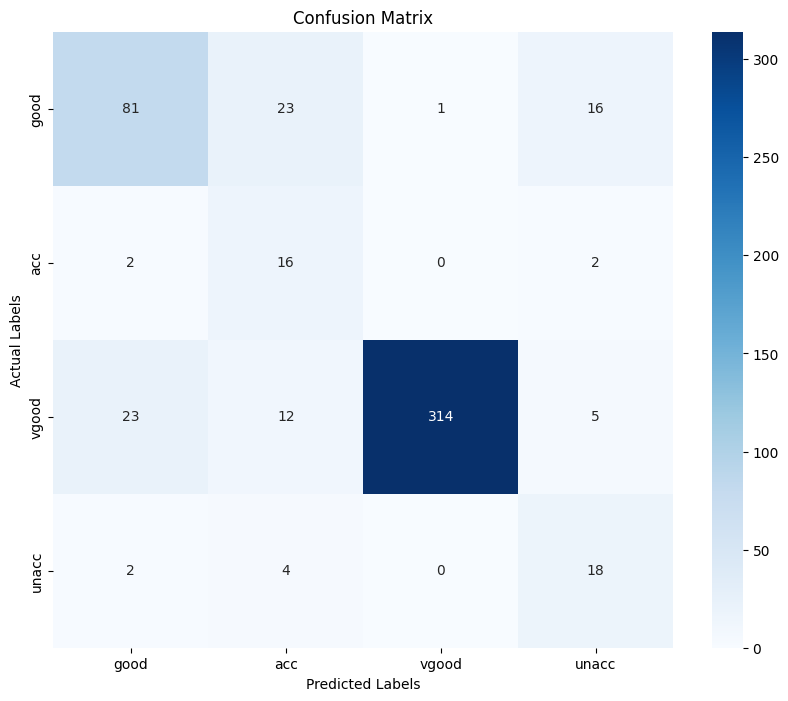

In [32]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_test), yticklabels=set(y_test))
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

Model in use

In [33]:
# Function to create a dropdown from a list of options
def create_dropdown(label, options):
    return widgets.Dropdown(
        options=options,
        value=options[0],
        description=label,
        disabled=False,
    )

# Create dropdowns for each attribute
buying_dropdown = create_dropdown('Buying', ['high', 'low', 'med', 'vhigh'])
maint_dropdown = create_dropdown('Maintenance', ['high', 'low', 'med', 'vhigh'])
doors_dropdown = create_dropdown('Doors', ['2', '3', '4', '5more'])
persons_dropdown = create_dropdown('Persons', ['2', '4', 'more'])
lug_boot_dropdown = create_dropdown('Lug Boot', ['small', 'med', 'big'])
safety_dropdown = create_dropdown('Safety', ['high', 'low', 'med'])

# Display the dropdowns
display(buying_dropdown, maint_dropdown, doors_dropdown, persons_dropdown, lug_boot_dropdown, safety_dropdown)

# Button to predict class
predict_button = widgets.Button(description="Predict Class")
output = widgets.Output()

# Function to handle button click and predict class
def on_predict_button_clicked(b):
    with output:
        output.clear_output()
        features = {
            'buying_high': 1 if buying_dropdown.value == 'high' else 0,
            'buying_low': 1 if buying_dropdown.value == 'low' else 0,
            'buying_med': 1 if buying_dropdown.value == 'med' else 0,
            'buying_vhigh': 1 if buying_dropdown.value == 'vhigh' else 0,
            'maint_high': 1 if maint_dropdown.value == 'high' else 0,
            'maint_low': 1 if maint_dropdown.value == 'low' else 0,
            'maint_med': 1 if maint_dropdown.value == 'med' else 0,
            'maint_vhigh': 1 if maint_dropdown.value == 'vhigh' else 0,
            'doors_2': 1 if doors_dropdown.value == '2' else 0,
            'doors_3': 1 if doors_dropdown.value == '3' else 0,
            'doors_4': 1 if doors_dropdown.value == '4' else 0,
            'doors_5more': 1 if doors_dropdown.value == '5more' else 0,
            'persons_2': 1 if persons_dropdown.value == '2' else 0,
            'persons_4': 1 if persons_dropdown.value == '4' else 0,
            'persons_more': 1 if persons_dropdown.value == 'more' else 0,
            'lug_boot_big': 1 if lug_boot_dropdown.value == 'big' else 0,
            'lug_boot_med': 1 if lug_boot_dropdown.value == 'med' else 0,
            'lug_boot_small': 1 if lug_boot_dropdown.value == 'small' else 0,
            'safety_high': 1 if safety_dropdown.value == 'high' else 0,
            'safety_low': 1 if safety_dropdown.value == 'low' else 0,
            'safety_med': 1 if safety_dropdown.value == 'med' else 0,
        }
        user_features_df = pd.DataFrame([features])
     
        predicted_class = knn.predict(user_features_df)
        print("Predicted Class of the car:", predicted_class[0])

# Event Listener for button
predict_button.on_click(on_predict_button_clicked)

display(predict_button, output)


Dropdown(description='Buying', options=('high', 'low', 'med', 'vhigh'), value='high')

Dropdown(description='Maintenance', options=('high', 'low', 'med', 'vhigh'), value='high')

Dropdown(description='Doors', options=('2', '3', '4', '5more'), value='2')

Dropdown(description='Persons', options=('2', '4', 'more'), value='2')

Dropdown(description='Lug Boot', options=('small', 'med', 'big'), value='small')

Dropdown(description='Safety', options=('high', 'low', 'med'), value='high')

Button(description='Predict Class', style=ButtonStyle())

Output()